# World Happiness Project :- DataTrained 

### Problem Statement:

#### Predict the happiness using the features provided in the data.

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#viewing data from Github

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#checking null

data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
data["Country"].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [5]:
#checking shape of the data

data.shape

(158, 12)

In [6]:
# extract all column name 

data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
# renaming the actual column with some revised name

data.columns= ["Country", "region", "Happiness_Rank", "Happiness_Score", "Std_Error", "GDP_per_capita","Family", "Health_Life", "Freedom", "Trust", "Generosity", "Residual"]
data.head()

,Country,region,Happiness_Rank,Happiness_Score,Std_Error,GDP_per_capita,Family,Health_Life,Freedom,Trust,Generosity,Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [8]:
#checking basic statistical details

data.describe() 

,Happiness_Rank,Happiness_Score,Std_Error,GDP_per_capita,Family,Health_Life,Freedom,Trust,Generosity,Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
# checking for duplicate value

data.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'Happiness_Rank'}>,
        <AxesSubplot:title={'center':'Happiness_Score'}>,
        <AxesSubplot:title={'center':'Std_Error'}>],
       [<AxesSubplot:title={'center':'GDP_per_capita'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health_Life'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Residual'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

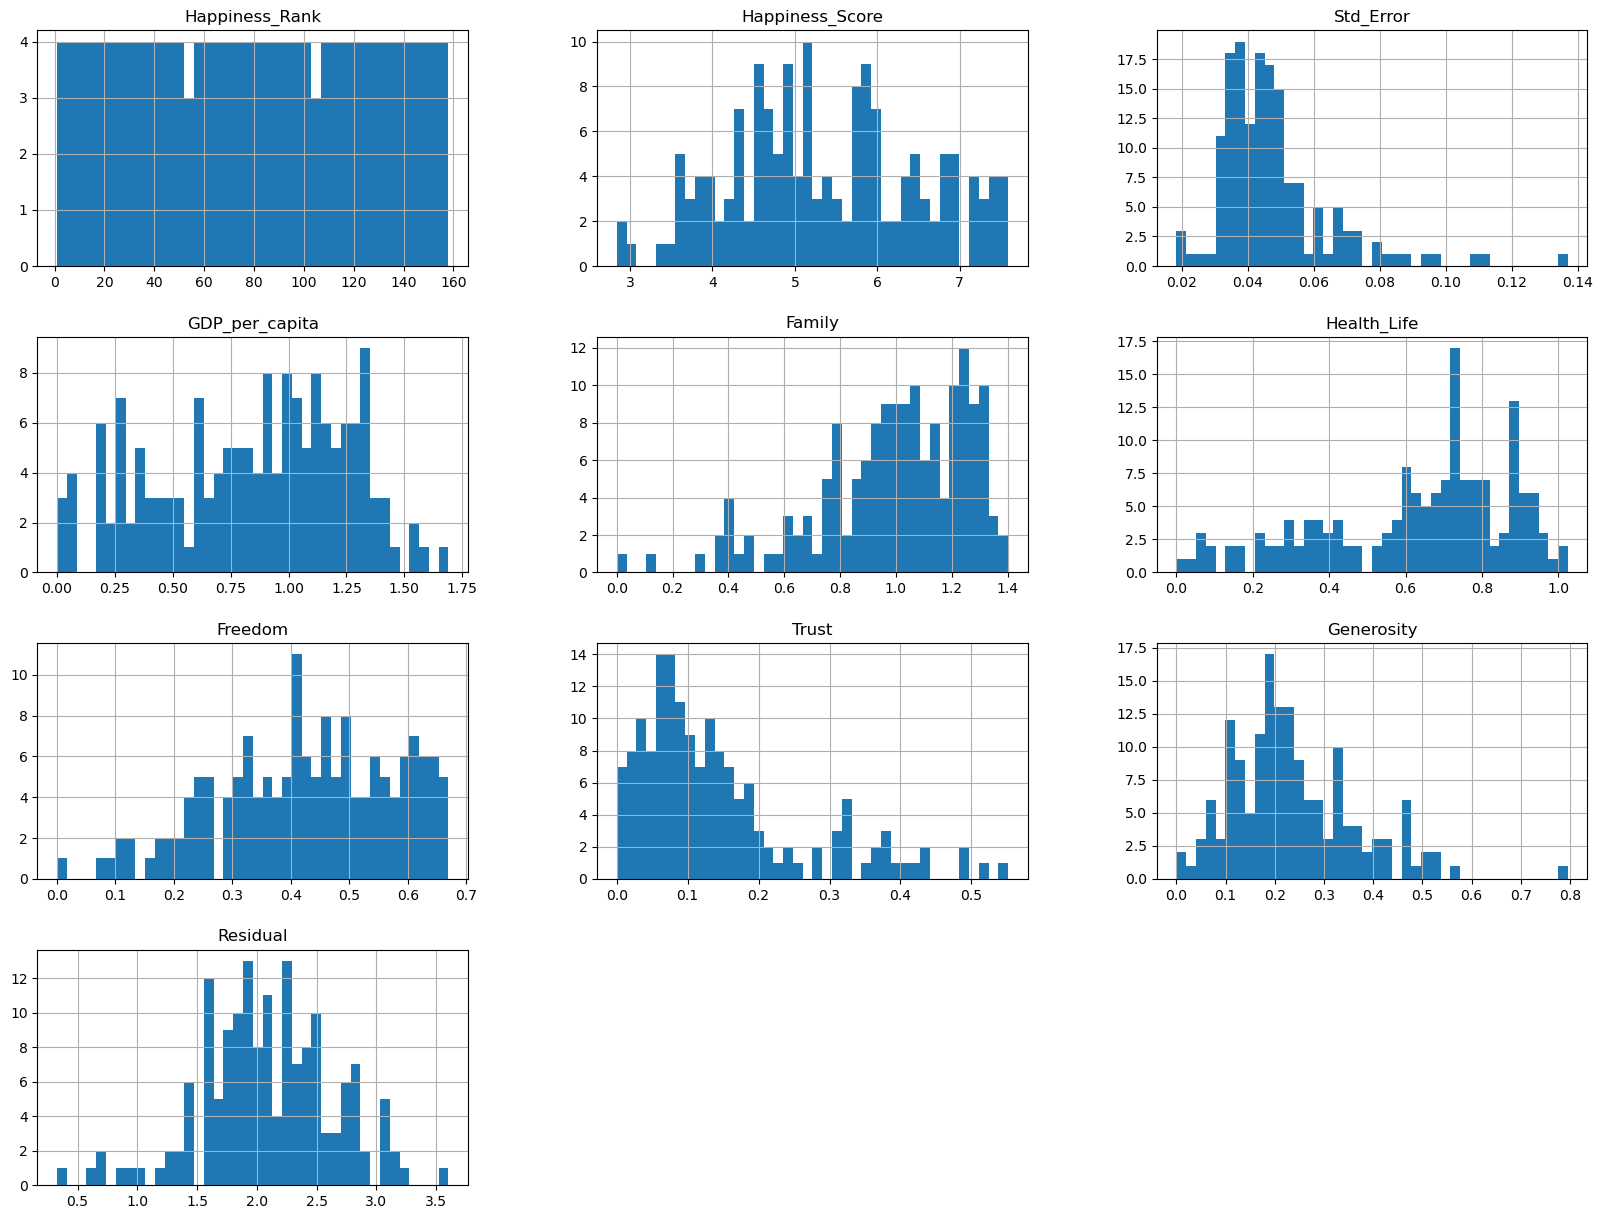

In [10]:
# checking the frequency distribution of the variables

data.hist(bins=40, figsize=(20, 15))

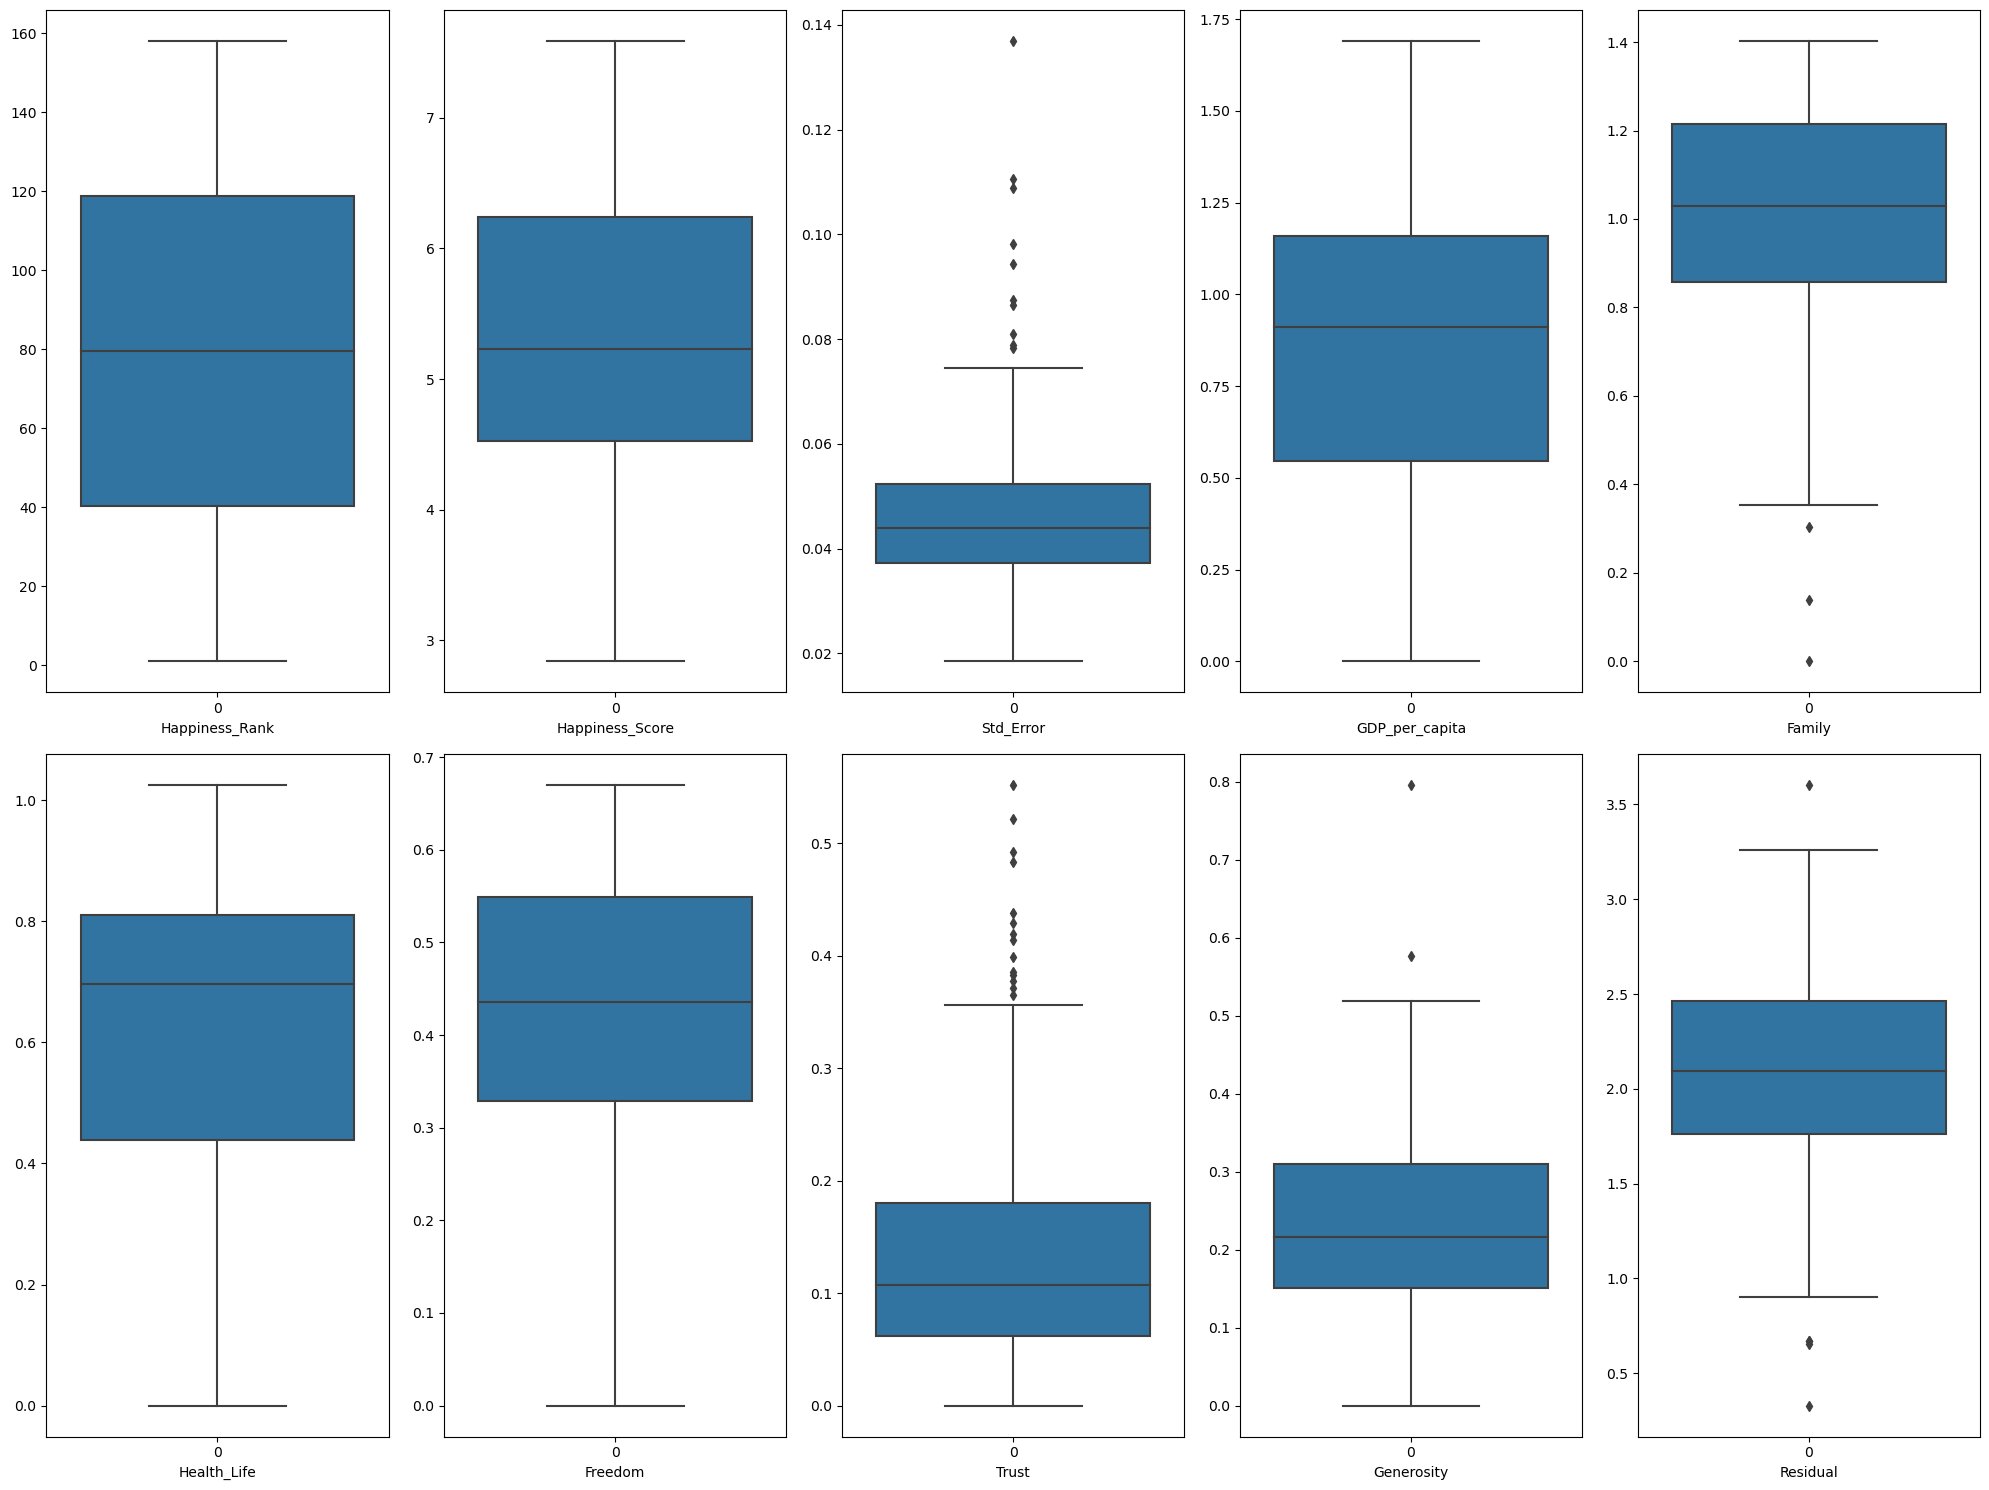

In [11]:
# checking for outliers using boxplots

data1= data.drop(columns= ["Country","region"]) # drop the categorical columns for boxplot
plt.figure(figsize=(20,15))
plno=1
for x in data1:
    if plno<=10:
        plt.subplot(2,5,plno)
        sns.boxplot(data=data1[x])
        plt.xlabel (x, fontsize= 10)
    plno+=1
plt.tight_layout()

Here we can see that, Trust (Trust (Government Corruption)), std_error columns have too mant outliers.

Lets check the correlation and then drop the irrelevant column from the dataset if required.

<AxesSubplot:>

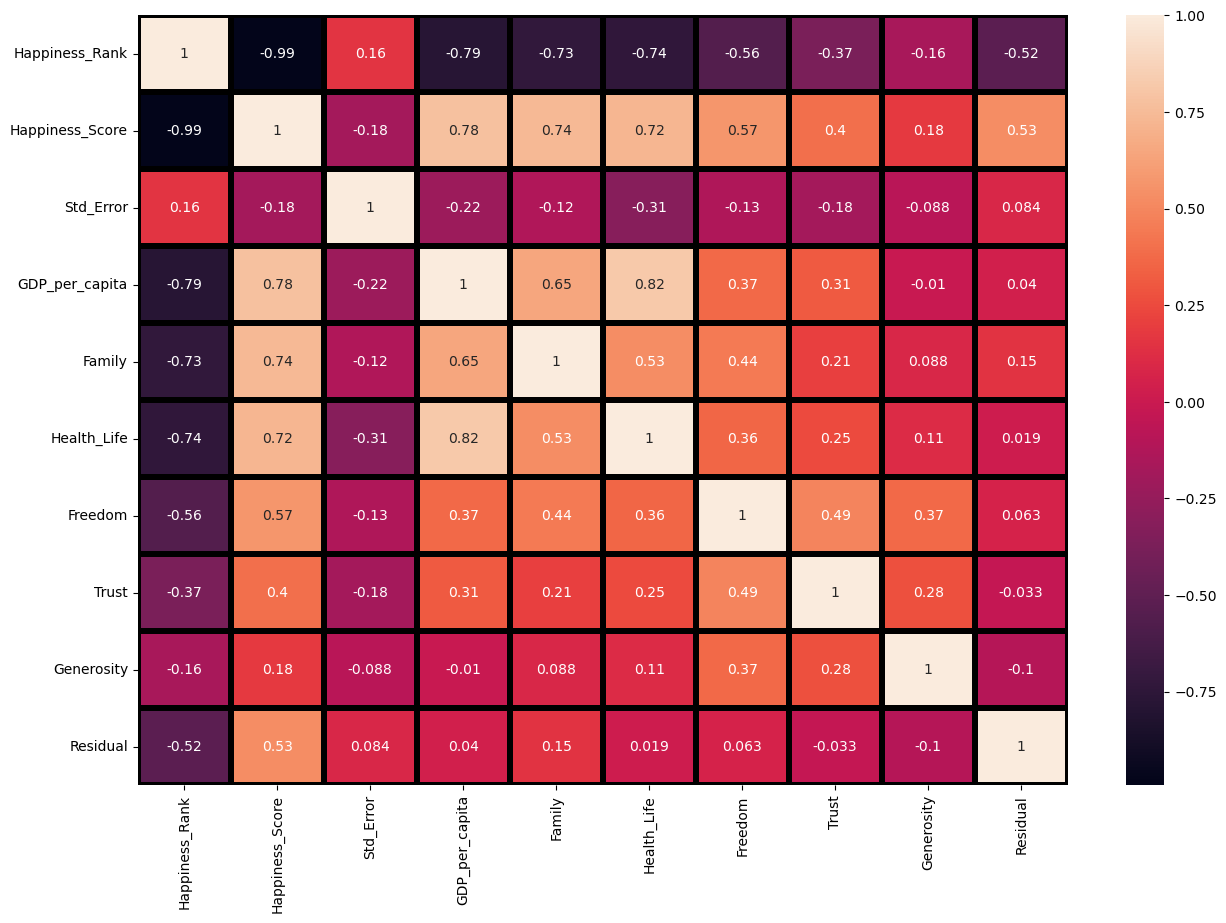

In [12]:
# Checking correlation between the features to decide which features affect the target variable the most

plt.figure(figsize=(15, 10))

sns.heatmap(data.corr(), annot= True, linecolor='black', linewidths=3)


Happiness Score correlates strongly with GDP per capita, Health_Life and Family.

The lighter the box, the stronger/higher the correlation.

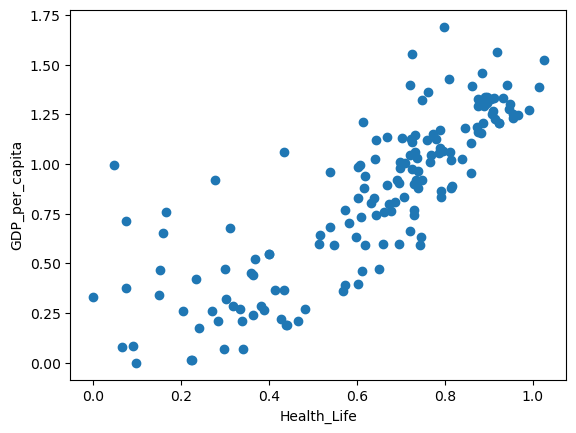

In [13]:
# seems Health_Life  and GDP_per_capita is correlated. let's check
plt.scatter(data.Health_Life, data.GDP_per_capita)
plt.xlabel("Health_Life")
plt.ylabel("GDP_per_capita")
plt.show()

Health_Life and GDP_per_capita is correlated. But Happiness_Score is very strongly correlated with both of them.

So both of them are kept.

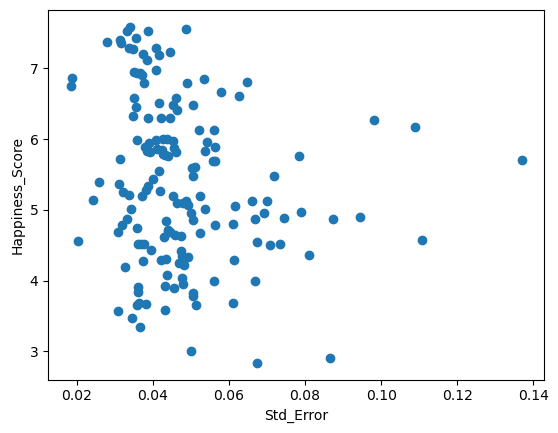

In [14]:
# seems Std_Error and Happiness_Rank is very less correlated. let's check.

plt.scatter(data.Std_Error, data.Happiness_Score)
plt.xlabel("Std_Error")
plt.ylabel("Happiness_Score")
plt.show()

No relation is found between Std_Error and Happiness_Rank as there is no pattern.

Drop the column Std_Error.

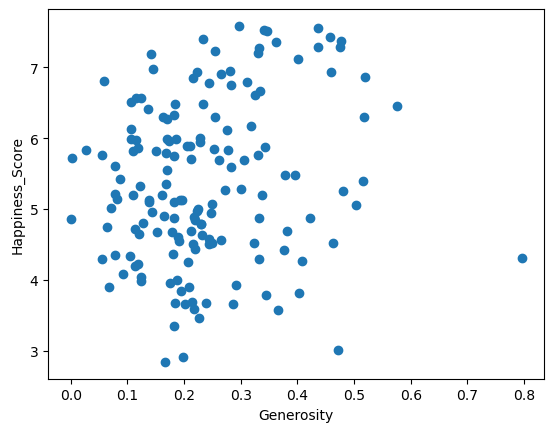

In [15]:
# seems Residual and Happiness_Rank is very less correlated. let's check.

plt.scatter(data.Generosity, data.Happiness_Score)
plt.xlabel("Generosity")
plt.ylabel("Happiness_Score")
plt.show()

No relation is found between Generosity and Happiness_Rank as there is no pattern.

Drop the column Generosity.

In [16]:
# dropping irrelevant columns for those Happiness_Rank is very less correlated

data.drop(columns=['Std_Error', 'region', 'Generosity'], inplace= True)
data.head()

,Country,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health_Life,Freedom,Trust,Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176


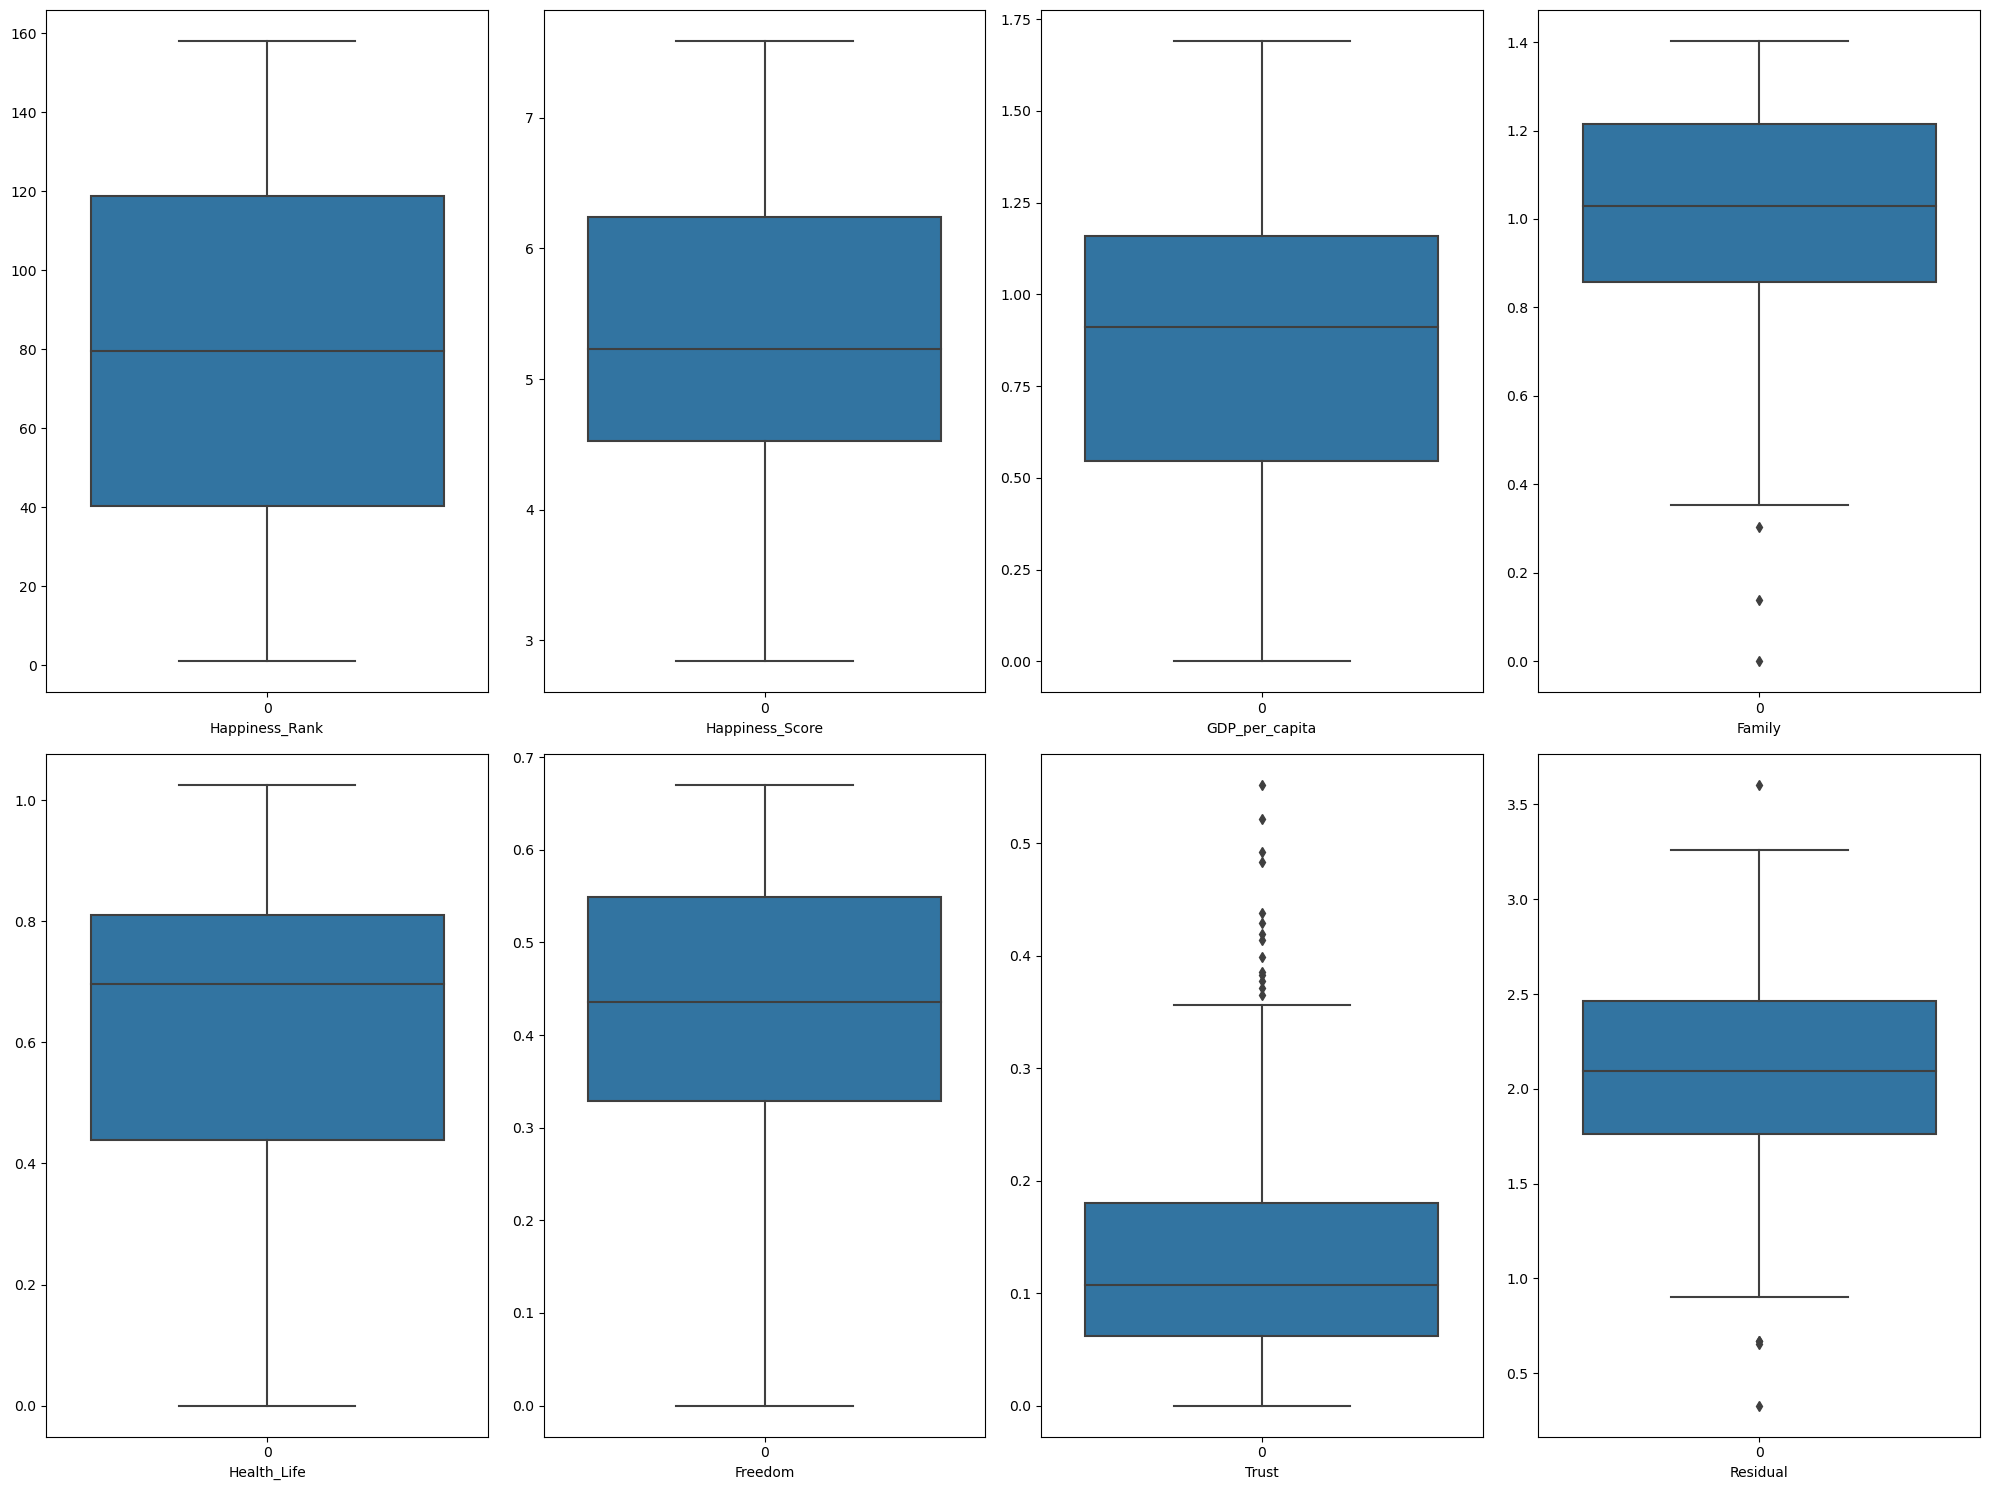

In [17]:
data1= data.drop(columns= ["Country"]) # drop the categorical column for boxplot
plt.figure(figsize=(20,15))
plno=1
for x in data1:
    if plno<=10:
        plt.subplot(2,4,plno)
        sns.boxplot(data=data1[x])
        plt.xlabel (x, fontsize= 10)
    plno+=1
plt.tight_layout()

Too much outliers are present in Trust after deleting 'Std_Error', 'region', 'Generosity'.

Let's remove all the outliers from Trust column.

In [18]:
#1st quantile
q1= data. quantile(0.25)
#3rd quantile
q3= data. quantile(0.75)
#IQR
iqr= q3-q1

In [19]:
# determine higher value (Trust_h) from Trust column using IQR 

Trust_h=(q3.Trust+(1.5*iqr.Trust))

# Extract the index no of the data for which the Trust value is higher than Trust_h

index=np.where(data['Trust']>Trust_h)

#Drop the data with the specified index number

data=data.drop(data.index[index])

#Reset the index number

data.reset_index()

,index,Country,Happiness_Rank,Happiness_Score,GDP_per_capita,Family,Health_Life,Freedom,Trust,Residual
0,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
1,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
2,6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,2.46570
3,9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,2.26646
4,10,Israel,11,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,3.08854
...,...,...,...,...,...,...,...,...,...,...
139,152,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,1.95210
140,154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,1.63328
141,155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.32858
142,156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,1.83302


In [20]:
# Check the new shape of the data

data.shape 

(144, 9)

(158-144)= 14 outliers data are deleted from the main dataset.

### Modeling and Prediction

Now the data is clean and let's construct the model.

Drop any categorical variables(Country) and the happiness rank as it is not relevant.


In [21]:
new_data = data.drop(['Country', 'Happiness_Rank'], axis=1)

new_data.head()

,Happiness_Score,GDP_per_capita,Family,Health_Life,Freedom,Trust,Residual
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
6,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,2.46570
9,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,2.26646
10,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,3.08854


In [22]:
# after cleaning dataset the new dataset is saved as new_data

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 157
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Happiness_Score  144 non-null    float64
 1   GDP_per_capita   144 non-null    float64
 2   Family           144 non-null    float64
 3   Health_Life      144 non-null    float64
 4   Freedom          144 non-null    float64
 5   Trust            144 non-null    float64
 6   Residual         144 non-null    float64
dtypes: float64(7)
memory usage: 9.0 KB


In [23]:
# Let's split x = all features and y = target variable

x= new_data.drop(columns=['Happiness_Score'])
y = new_data['Happiness_Score']

Next we need to standarized the data

Then split the whole data into training(75%) and testing(25%) sets

In [24]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

# split the whole data

x_train, x_test, y_train, y_test = train_test_split(x_scaled , y , test_size = 0.25, random_state = 200)

### Training od the model with different algorithms

Import Linear regression, Decision tree, KNN, Random forest regreesor to train the model.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

reg= LinearRegression()
dt= DecisionTreeRegressor()
knn= KNeighborsRegressor()
rf = RandomForestRegressor()

#Train all of the model with the dataset

reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
rf.fit(x_train,y_train)
print("All models are trained.")

All models are trained.


In [26]:
#check how well the model fits on our training data
#print adjusted r2 score

print ("reg training score: " ,reg.score(x_train,y_train))
print ("dt training score: ", dt.score(x_train,y_train))
print ("knn training score: ", knn.score(x_train,y_train))
print ("rf training score: ", rf.score(x_train,y_train))

reg training score:  0.9875416773325423
dt training score:  1.0
knn training score:  0.9317465802351281
rf training score:  0.9855154277953162


In [27]:
#check how well the model fits on our test data
#adjusted r2 score

print ("reg test score: " ,reg.score(x_test,y_test))
print ("dt test score: ", dt.score(x_test,y_test))
print ("knn test score: ", knn.score(x_test,y_test))
print ("rf test score: ", rf.score(x_test,y_test))

reg test score:  0.9931561998419552
dt test score:  0.8154269121162683
knn test score:  0.9181874960834268
rf test score:  0.9161203396802937


For LinearRegression() the variation of r2 score of train data and test data is small.

So the best model for this particular dataset is LinearRegression()

In [28]:
# making predictions on the test data

y_pred = reg.predict(x_test)
y_pred

array([5.34868875, 4.77769916, 5.85522115, 4.21835416, 7.19288862,
       4.196321  , 5.87049357, 6.66303731, 3.6679643 , 5.93114327,
       5.87937185, 6.33519002, 4.63570877, 4.8316541 , 4.87467095,
       6.90046618, 3.71155098, 6.97898606, 6.72190221, 2.92201411,
       5.86114986, 3.6476753 , 4.04134923, 5.98015022, 4.77252316,
       4.99057804, 5.16898834, 3.9766524 , 7.12249922, 4.65817954,
       5.16103567, 4.23300111, 4.47269439, 6.78011272, 7.05825356,
       5.05937471])

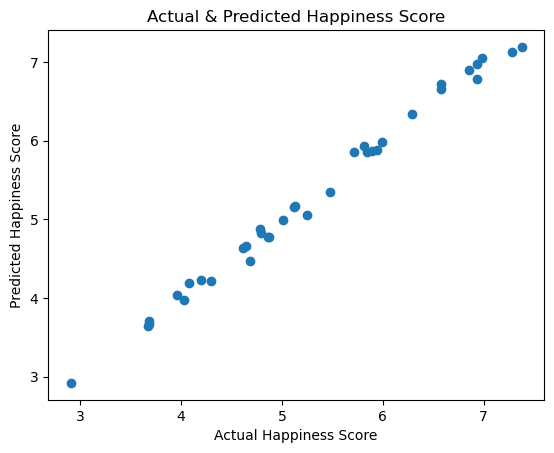

In [29]:
# Let's visualize the variation of actual test data and predicted data

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual & Predicted Happiness Score")
plt.show()

In [30]:
# Calculate MSE, MAE, RMSE

from sklearn.metrics import mean_squared_error, mean_absolute_error

print ("MSE", mean_squared_error(y_test, y_pred))
print ("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", np.sqrt (mean_squared_error(y_test, y_pred)))

MSE 0.00916910423891488
MAE 0.07661396769568299
RMSE 0.0957554397353742


Determine coeffiecients to easily determine which variable carries more weight

In [31]:
coefficient = reg.coef_
coefficient

array([0.31177502, 0.27531572, 0.28875233, 0.18185331, 0.10286084,
       0.52702157])

In [32]:
l=list(zip(x.columns, coefficient))

coefficient_details= pd.DataFrame(l, columns=["Features", "Coefficient"])
coefficient_details

,Features,Coefficient
0,GDP_per_capita,0.311775
1,Family,0.275316
2,Health_Life,0.288752
3,Freedom,0.181853
4,Trust,0.102861
5,Residual,0.527022


From the output above, we see that Residual(Dystopia Residual) is more correlated with Happiness Score than GDP per capita.

Now check wheather my model is overfitted or not.

In [33]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [34]:
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha  

0.000896395987130531

In [35]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.9931569870917651


The model score is unchanged after applying LASSO regression that is the model was not overfitted

In [36]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for RIDGE
alpha  

0.000896395987130531

In [37]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.9931562071452039


Again the model score is unchanged after applying Ridge regression also that is the model is not overfitted.

### Load and save the model

Now , let's save the model for future use.

In [38]:
pickle.dump(reg, open("happiness_regression_model", "wb"))

load_happiness_regression_model= pickle.load(open("happiness_regression_model", "rb"))

In [39]:
# Use "load_happiness_regression_model" for nexttime use

load_happiness_regression_model.score(x_test, y_test)

0.9931561998419552